# Import package


In [19]:
# install numpy
# install pandas
# install matplotlib
# install sklearn
# install seaborn
# install scikit-learn
# install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, LogisticRegression, LinearRegression 
from sklearn.metrics import *
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, KBinsDiscretizer , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Làm sạch dữ liệu ( cleaning data)

### Tạo dataframe (Create dataframe)

In [20]:
data_frame_test = pd.read_csv("test.csv")
data_frame_train = pd.read_csv("train.csv")
data_frame = pd.concat([data_frame_test,data_frame_train],ignore_index = True)


In [21]:
data_frame

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
129877,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


### Xóa cột không cần thiết (Drop columns)

In [22]:
data_frame = data_frame.sort_values(by = 'id')
data_frame = data_frame.drop(columns = 'id')
data_frame = data_frame.drop(columns='Unnamed: 0')
data_frame.reset_index(drop=True, inplace=True)


In [23]:
first_column = data_frame.iloc[:, 0]
print(first_column)

0           Male
1         Female
2           Male
3           Male
4         Female
           ...  
129875      Male
129876      Male
129877      Male
129878      Male
129879    Female
Name: Gender, Length: 129880, dtype: object


### Xử lí dữ liệu trùng (Duplicate Data)

In [24]:
data_frame.drop_duplicates(inplace=True)

In [25]:
print('Số dòng trùng nhau :',data_frame.duplicated().sum())
data_frame

Số dòng trùng nhau : 0


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
1,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
2,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
3,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
4,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,Loyal Customer,28,Personal Travel,Eco Plus,447,4,4,4,2,...,4,5,4,4,4,5,4,2,3.0,neutral or dissatisfied
129876,Male,Loyal Customer,41,Personal Travel,Eco Plus,308,3,5,3,4,...,2,5,5,5,5,4,2,0,0.0,neutral or dissatisfied
129877,Male,Loyal Customer,42,Personal Travel,Eco Plus,337,2,5,2,1,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied
129878,Male,Loyal Customer,50,Personal Travel,Eco Plus,337,5,4,4,1,...,3,4,5,5,3,4,3,31,22.0,satisfied


### Xử lí dữ liệu thiếu (Missing Data)

In [26]:

print(data_frame.isnull().sum())

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64


In [27]:
temp = np.round(data_frame['Arrival Delay in Minutes'].mean(), 2)
data_frame['Arrival Delay in Minutes'] = data_frame['Arrival Delay in Minutes'].fillna(temp)

In [28]:
data_frame.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [29]:
data_frame

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
1,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
2,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
3,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
4,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,Loyal Customer,28,Personal Travel,Eco Plus,447,4,4,4,2,...,4,5,4,4,4,5,4,2,3.0,neutral or dissatisfied
129876,Male,Loyal Customer,41,Personal Travel,Eco Plus,308,3,5,3,4,...,2,5,5,5,5,4,2,0,0.0,neutral or dissatisfied
129877,Male,Loyal Customer,42,Personal Travel,Eco Plus,337,2,5,2,1,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied
129878,Male,Loyal Customer,50,Personal Travel,Eco Plus,337,5,4,4,1,...,3,4,5,5,3,4,3,31,22.0,satisfied


# Trực quan hóa dữ liệu (Data Visualization)

## Tính toán số liệu thống kê cơ bản (Calculate basic statistics )

In [30]:
data_frame.select_dtypes(include= 'number').describe().T


,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0


## Phân bố của từng đối tượng (Distribution of each object)

### Gener, Customer Type, Type of Travel, Class, Satisfaction

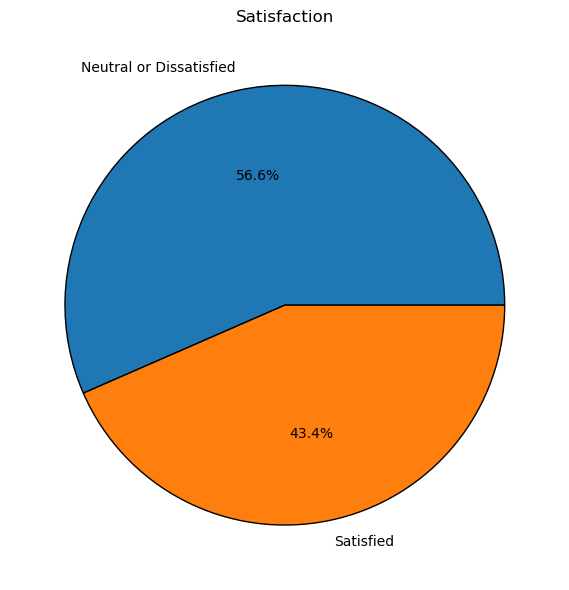

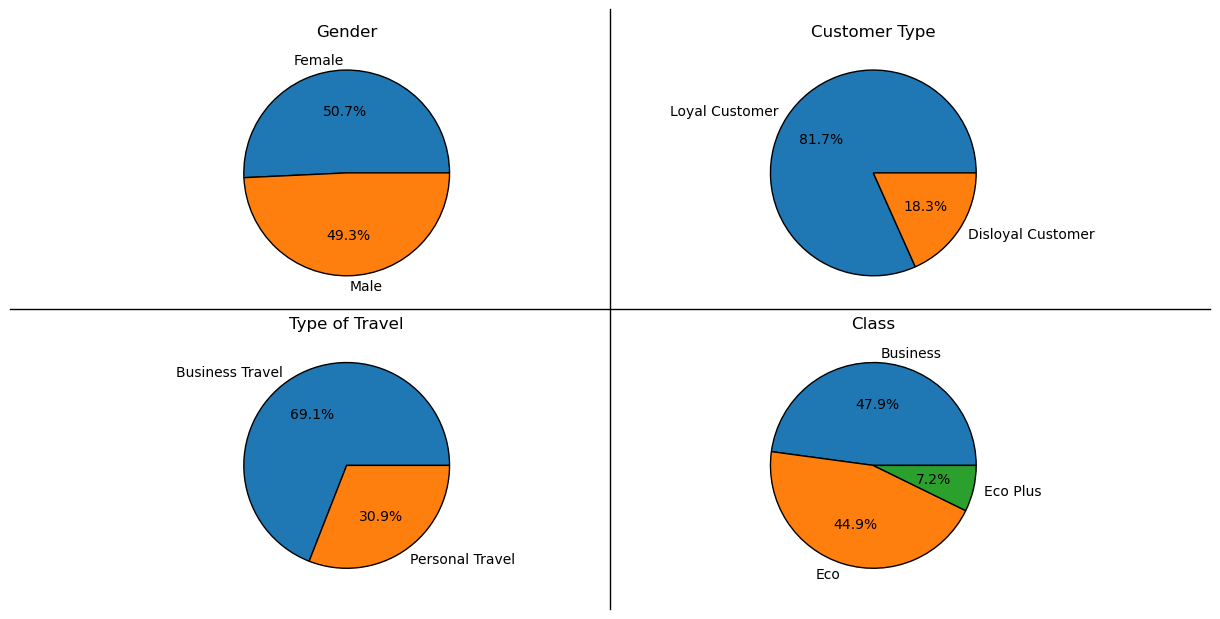

In [31]:
# Pie chart for Satisfaction
fig, ax = plt.subplots(figsize=(12,6))
ax.pie(
    data_frame['satisfaction'].value_counts(),
    labels=['Neutral or Dissatisfied', 'Satisfied'],
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
ax.set_title("Satisfaction")
plt.tight_layout(rect=[0, 0, 1, 1])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,6), sharey=True)
fig.add_artist(plt.Line2D([0.5, 0.5], [0, 1], color="black", linewidth=1, transform=fig.transFigure)) 
fig.add_artist(plt.Line2D([0, 1], [0.5, 0.5], color="black", linewidth=1, transform=fig.transFigure))  
# Pie chart for Gender
ax1.pie(
    data_frame['Gender'].value_counts(),
    labels=['Female', 'Male'],
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
ax1.set_title("Gender")

# Pie chart for Customer Type
ax2.pie(
    data_frame['Customer Type'].value_counts(),
    labels=['Loyal Customer', 'Disloyal Customer'],
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
ax2.set_title("Customer Type")

# Pie chart for Type of Travel
ax3.pie(
    data_frame['Type of Travel'].value_counts(),
    labels=['Business Travel', 'Personal Travel'],
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
ax3.set_title("Type of Travel")

# Pie chart for Class
ax4.pie(
    data_frame['Class'].value_counts(),
    labels=['Business', 'Eco', 'Eco Plus'],
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
ax4.set_title("Class")
plt.tight_layout(rect=[0, 0, 1, 1])

### Flight Distance,Departure Delay in Minutes, Arrival Delay in Minutes, 

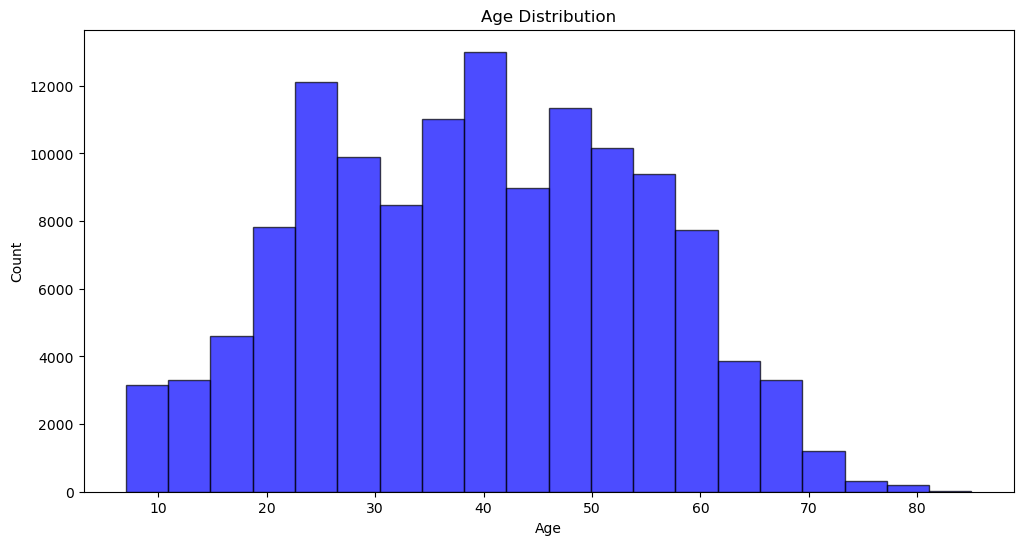

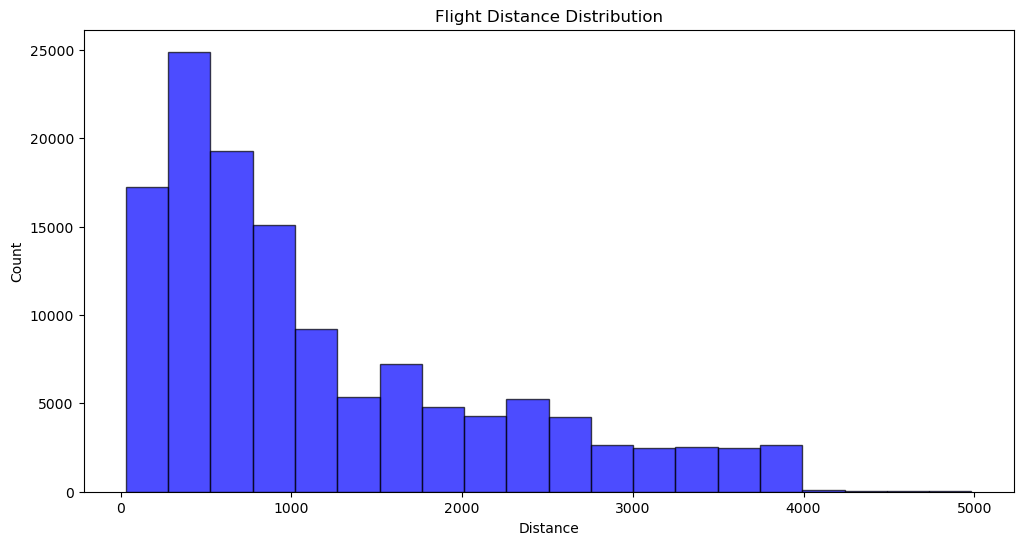

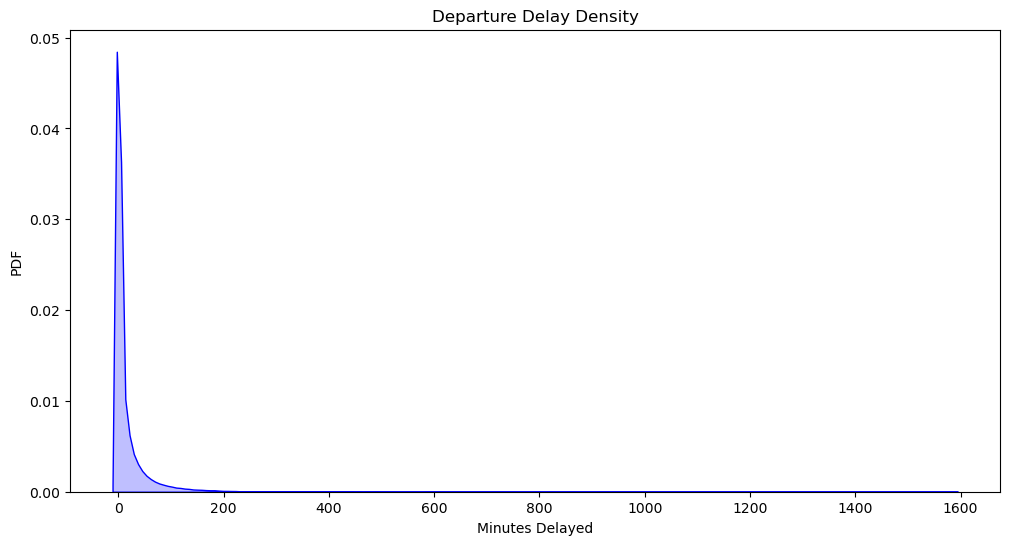

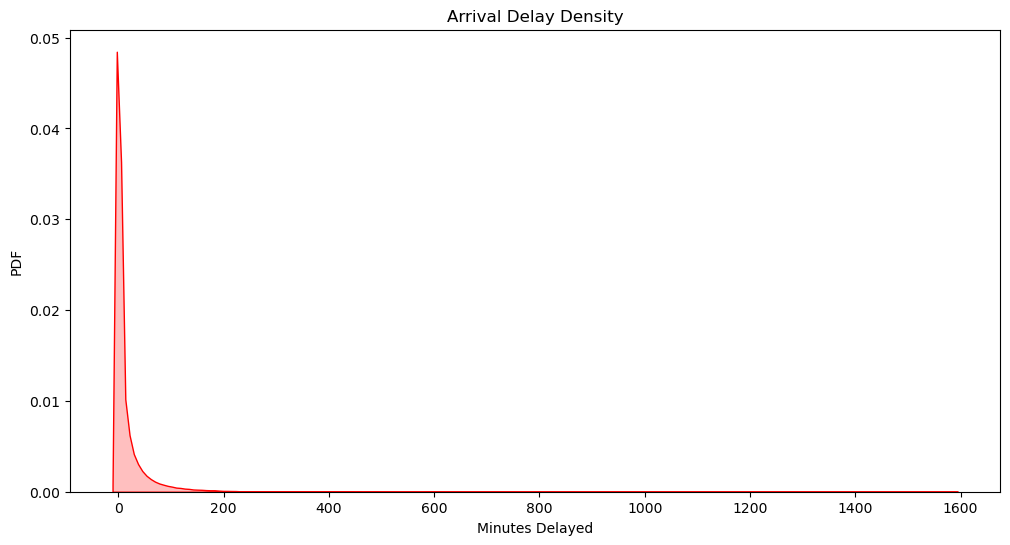

<Figure size 640x480 with 0 Axes>

In [32]:
# Histogram plot for Age
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(data_frame['Age'], bins=20, color='blue', edgecolor='black', alpha=0.7)
ax.set_title("Age Distribution")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
plt.show()
# Histogram plot for Flight Distance
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(data_frame['Flight Distance'], bins=20, color='blue', edgecolor='black', alpha=0.7)
ax.set_title("Flight Distance Distribution")
ax.set_xlabel("Distance")
ax.set_ylabel("Count")
plt.show()

# Line plot for Departure Delay in Minutes
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data_frame['Arrival Delay in Minutes'], fill=True, color='blue', ax=ax)
ax.set_title("Departure Delay Density")
ax.set_xlabel("Minutes Delayed")
ax.set_ylabel("PDF")
plt.show()

# Line plot for Arrival Delay in Minutes
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data_frame['Arrival Delay in Minutes'], fill=True, color='red', ax=ax)
ax.set_title("Arrival Delay Density")
ax.set_xlabel("Minutes Delayed")
ax.set_ylabel("PDF")
plt.show()
plt.tight_layout()
plt.show()

### Sự phân bố đánh giá của các dịch vụ (barh)

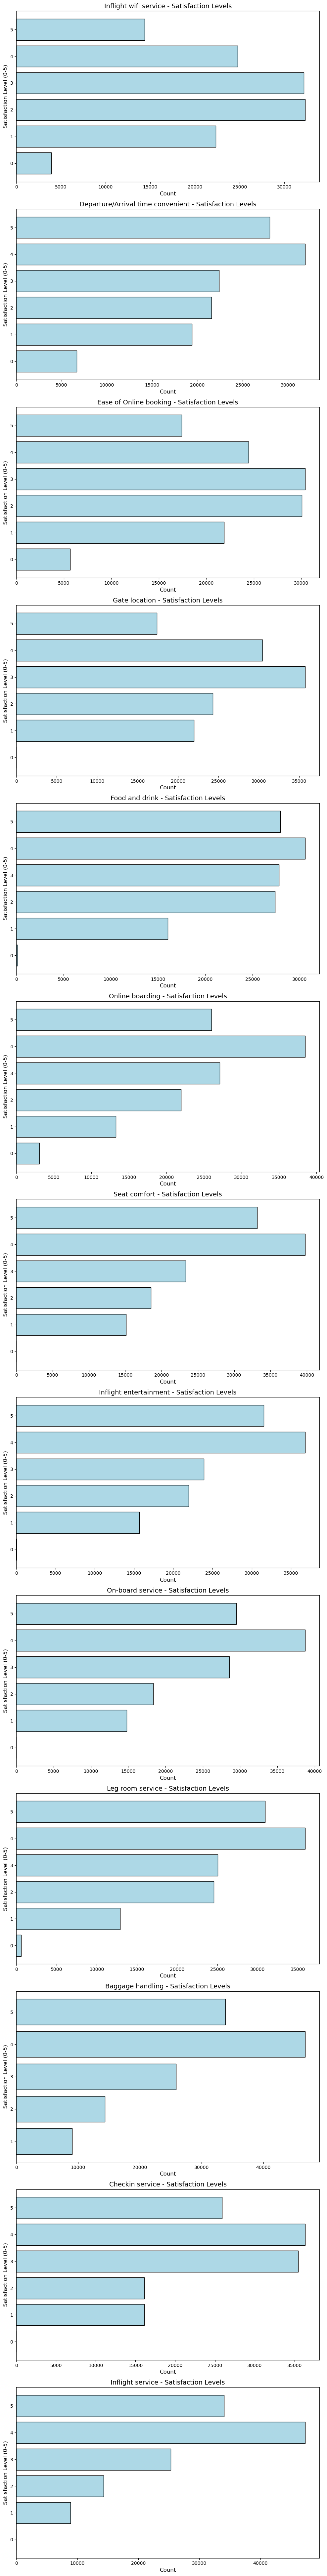

In [33]:
columns = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment', 
    'On-board service', 'Leg room service', 'Baggage handling', 
    'Checkin service', 'Inflight service'
]

# Tạo subplots để vẽ từng biểu đồ bar riêng biệt
fig, axes = plt.subplots(len(columns), 1, figsize=(10, 6 * len(columns)))

# Vẽ từng biểu đồ bar cho mỗi dịch vụ
for i, col in enumerate(columns):
    axes[i].barh(data_frame[col].value_counts().sort_index().index, 
                 data_frame[col].value_counts().sort_index(), 
                 color='lightblue', edgecolor='black')
    axes[i].set_title(f'{col} - Satisfaction Levels', fontsize=14)
    axes[i].set_xlabel('Count', fontsize=12)
    axes[i].set_ylabel('Satisfaction Level (0-5)', fontsize=12)

# Đặt khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()

### Sự phân bố đánh giá của các dịch vụ (boxplot)

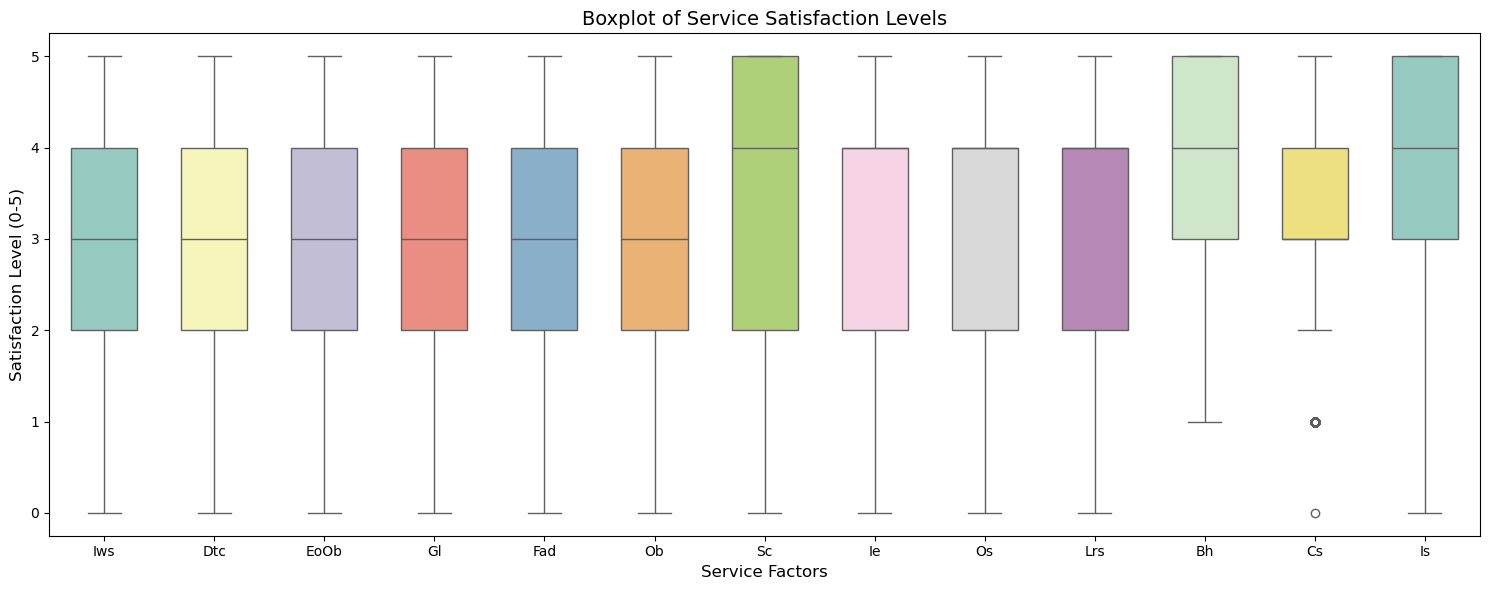

In [34]:
data_frame_copy_5 = data_frame.copy()
service_columns = ['Inflight wifi service', 'Departure/Arrival time convenient', 
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment', 
    'On-board service', 'Leg room service', 'Baggage handling', 
    'Checkin service', 'Inflight service']
ar_index = []
for i in service_columns:
    a = i.split(' ')
    s = ''
    for j in a:
        s += j[0]
    ar_index.append(s)
data_frame_copy_5_abbr = data_frame_copy_5[service_columns].copy()
data_frame_copy_5_abbr.columns = ar_index
plt.figure(figsize=(15, 6))
sns.boxplot(data=data_frame_copy_5_abbr, palette="Set3", width=0.6)
plt.title("Boxplot of Service Satisfaction Levels", fontsize=14)
plt.ylabel("Satisfaction Level (0-5)", fontsize=12)
plt.xlabel("Service Factors", fontsize=12)
plt.tight_layout()
plt.show()


## Sự tương quan giữa các đối tượng (Correlation between objects)

### Sự tương quan giữa các dối tượng 

<Axes: >

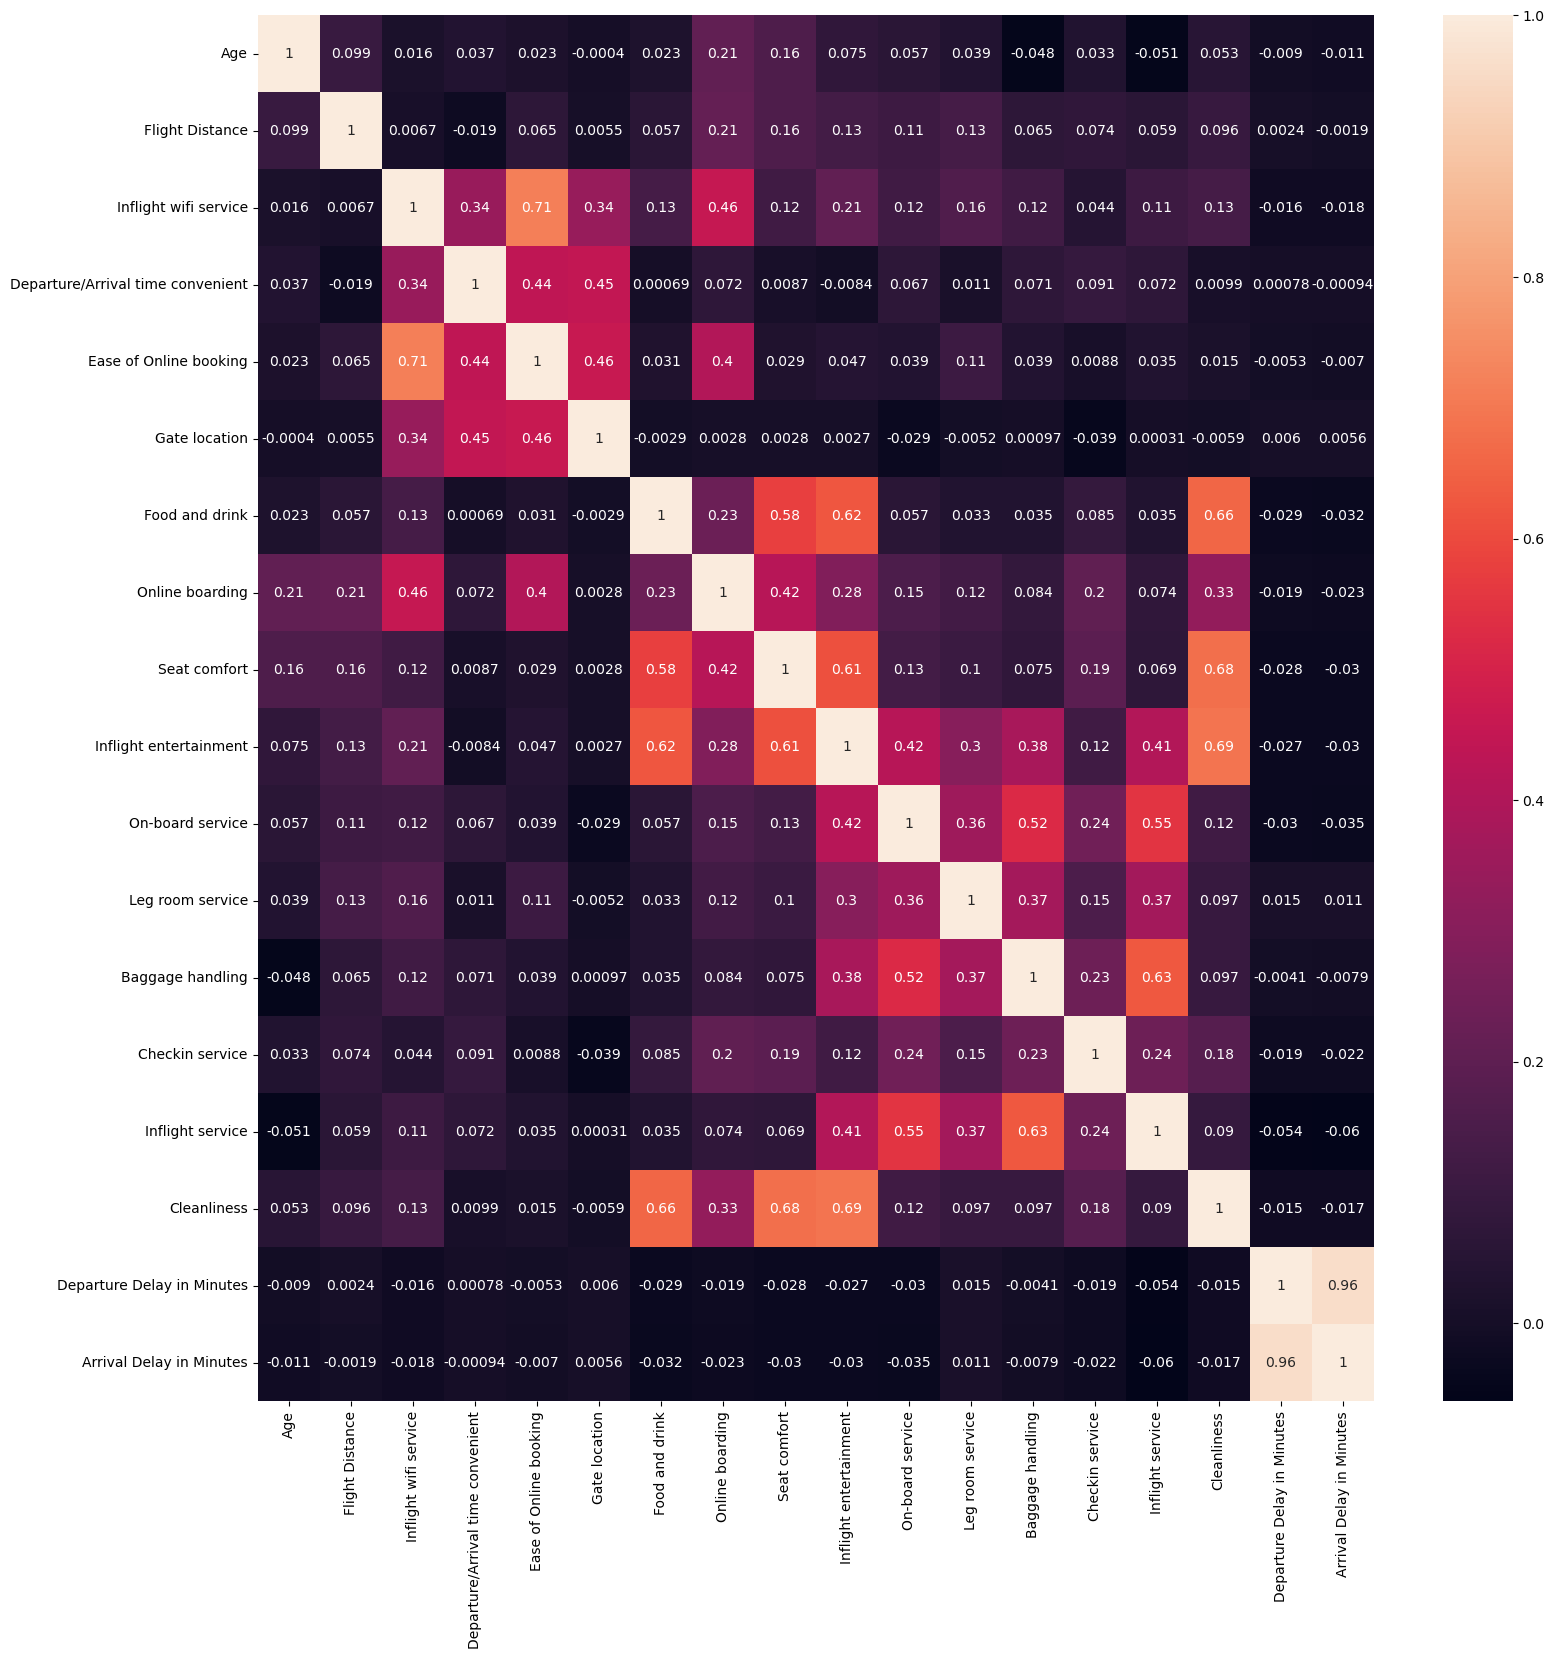

In [35]:
n_column = data_frame.select_dtypes(include=['number'])
n = n_column.corr()
plt.figure(figsize=(18,18))
sns.heatmap(n, annot=True)



### Tỉ lệ hài lòng theo loại khách hàng và mục đích chuyến đi ( Influence of Customer type and Type of travel on Satisfaction )

,name,Tong,satisfaction,Percentage by Type (%)
0,Loyal Business,66114,0,29.382582
1,Loyal Personal,39986,0,89.896464
2,disloyal Business,23579,0,75.961661
3,disloyal Personal,201,0,84.079602
4,Loyal Business,66114,1,70.617418
5,Loyal Personal,39986,1,10.103536
6,disloyal Business,23579,1,24.038339
7,disloyal Personal,201,1,15.920398


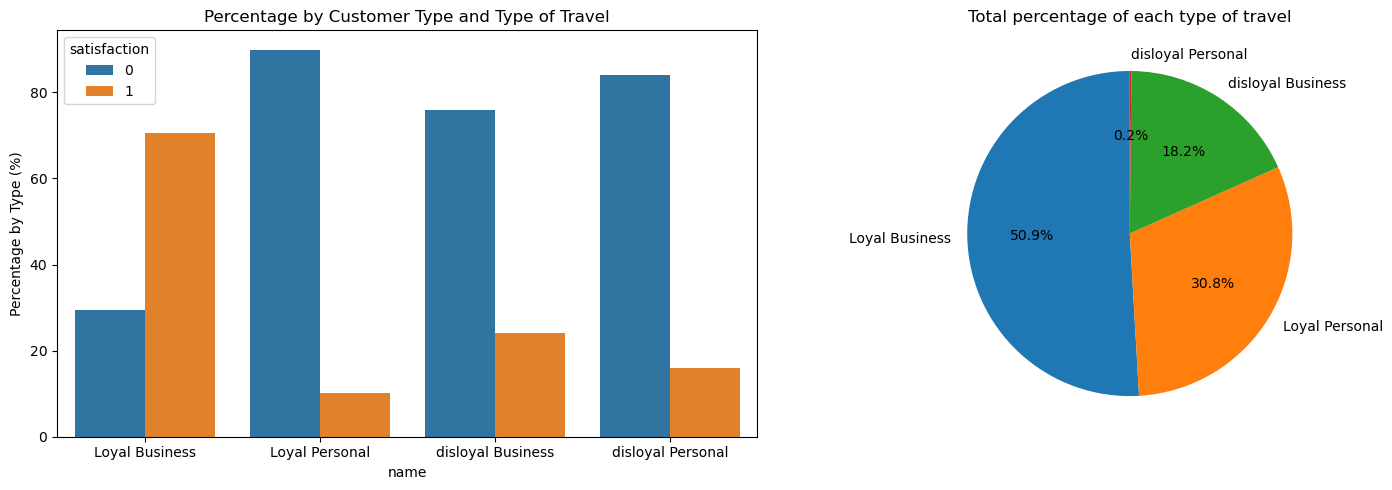

In [36]:
data_frame_copy_1 = data_frame.copy()
# fell satisfied = 1, neutral or dissatisfied = 0
data_frame_copy_1['satisfaction'] = data_frame_copy_1['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})
# create crosstab 
df_crosstab = pd.crosstab(
    index=[data_frame_copy_1['Customer Type'], data_frame_copy_1['Type of Travel']], 
    columns=data_frame_copy_1['satisfaction'],  
    margins=True,  
    margins_name="Tong"  
)
total_count = df_crosstab.iloc[-1, -1]
# calculator percentage satisfaction by customer type and type of travel
df_crosstab[[0, 1]] = df_crosstab[[0, 1]].div(df_crosstab["Tong"], axis=0) * 100
percent = df_crosstab.sort_index().drop(index="Tong")
percent_reset = percent.reset_index()
percent_reset['name'] = percent_reset['Customer Type'].str.split().str[0] + " " + percent_reset['Type of Travel'].str.split().str[0]
# reshape table wide into long 
percent_long = percent_reset.melt(  id_vars=["name","Tong"],
                                    value_vars=[0, 1],
                                    var_name="satisfaction", 
                                    value_name="Percentage by Type (%)")
fig , (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
# first plot
sns.barplot(x="name", y="Percentage by Type (%)", hue="satisfaction", data=percent_long, errorbar=None, edgecolor=None, ax=ax1)
ax1.set_title("Percentage by Customer Type and Type of Travel")
ax1.set_ylabel("Percentage by Type (%)")
# second plot
labels = percent_long[0:4]["name"]
sizes = percent_long[0:4]["Tong"]  
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, labeldistance=1.1)
ax2.set_title("Total percentage of each type of travel")
plt.tight_layout()
percent_long

### Sự tương quan giữa các dịch vụ và sự hài lòng (Correlation between service and satisfaction)

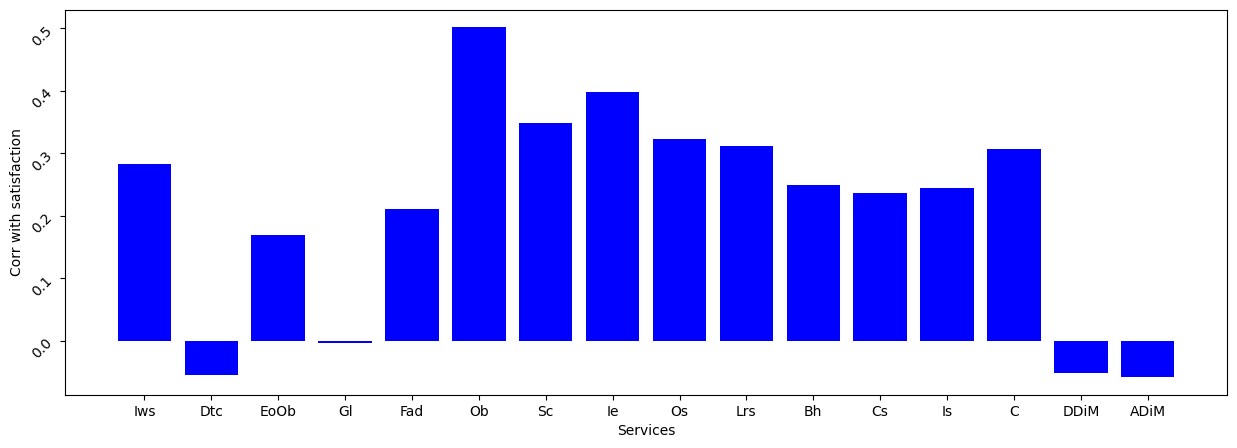

In [37]:
data_frame_copy_2 = data_frame.copy()
# fell satisfied = 1, neutral or dissatisfied = 0
data_frame_copy_2['satisfaction'] = data_frame_copy_2['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})
columns = list(data_frame.columns)[6:25]
data_col = data_frame_copy_2[columns]
#create a correlation matrix
matrix = data_col.corr()
satisfaction_matrix = matrix['satisfaction'].drop('satisfaction')
# create index of services
ar_index = []
for i in satisfaction_matrix.index:
    a = i.split(' ')
    s = ''
    for j in a:
        s += j[0]
    ar_index.append(s)
# plot 
fig,ax = plt.subplots(figsize= (15,5))
ax.bar(ar_index , satisfaction_matrix.values, color = 'blue')
plt.xlabel('Services')
plt.ylabel('Corr with satisfaction')
plt.yticks(rotation = 45)
plt.show()

### Quan hệ giữa tuổi và độ dài chuyến bay (Relationship between Age and Flight Distance)

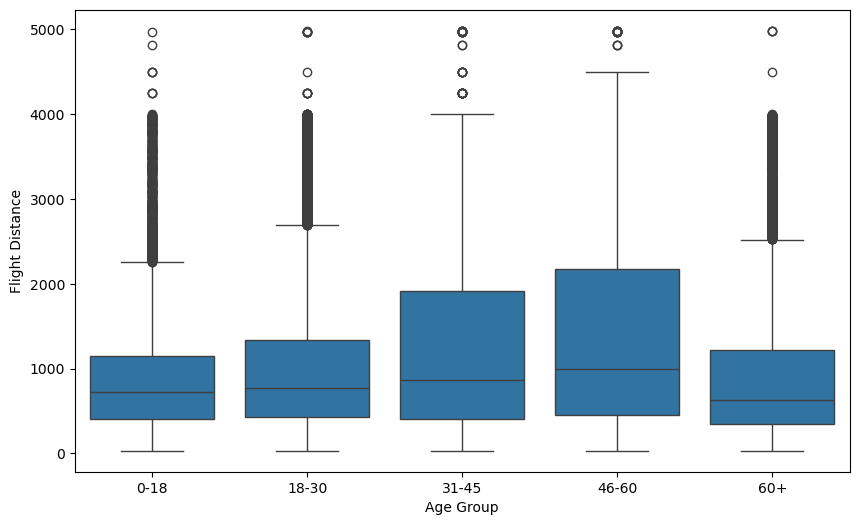

In [38]:
data_frame_copy_3 = data_frame.copy()
#index age
bins = [0, 18, 30, 45, 60, 100]  
labels = ['0-18','18-30', '31-45', '46-60', '60+']  
# cut age
data_frame_copy_3['Age Group'] = pd.cut(data_frame_copy_3['Age'], bins=bins, labels=labels)
data_frame_copy_3['Age Group'].value_counts()
# plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Flight Distance', data=data_frame_copy_3);

### Ảnh hường của thời gian trễ khởi hành và thời gian trễ khi đến (Relationship between Departure Delay in Minutes and Arrival Delay in Minutes) đến sự hài lòng của khách hàng(satisfaction)

C:\Users\abc\AppData\Local\Temp\ipykernel_12652\3917457626.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  j_plot.fig.tight_layout()
C:\Users\abc\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


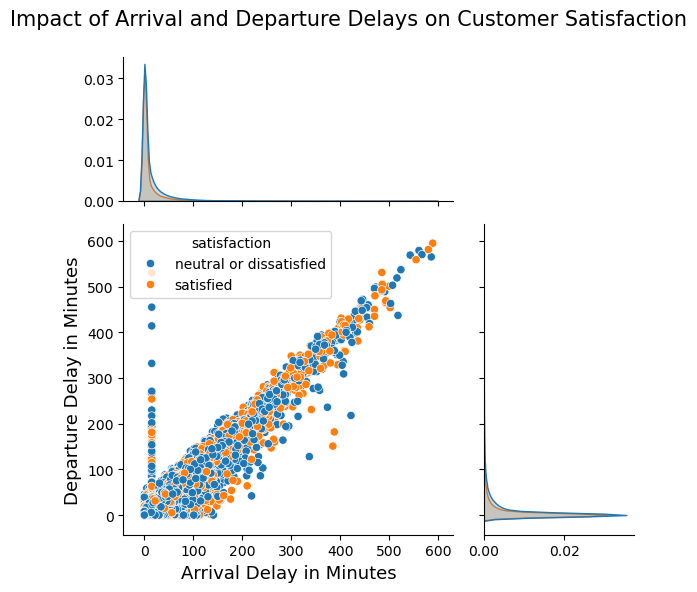

In [ ]:

data_frame_copy_4 = data_frame.copy()
data_frame_copy_4["Departure Delay in Minutes"]=data_frame_copy_4["Departure Delay in Minutes"][data_frame_copy_4["Departure Delay in Minutes"] < 600]
data_frame_copy_4["Arrival Delay in Minutes"]=data_frame_copy_4["Arrival Delay in Minutes"][data_frame_copy_4["Arrival Delay in Minutes"] < 600]
j_plot = sns.jointplot(data=df1, x="Arrival Delay in Minutes", y="Departure Delay in Minutes", hue="satisfaction",
            height=6,ratio = 2,marginal_ticks=True,dropna=True)

j_plot.fig.suptitle("Impact of Arrival and Departure Delays on Customer Satisfaction",fontsize = 15)
j_plot.set_axis_labels("Arrival Delay in Minutes", "Departure Delay in Minutes",fontsize = 13)
j_plot.fig.tight_layout()
j_plot.fig.subplots_adjust(top = 0.9)

### Tỉ lệ hài lòng theo loại vé 

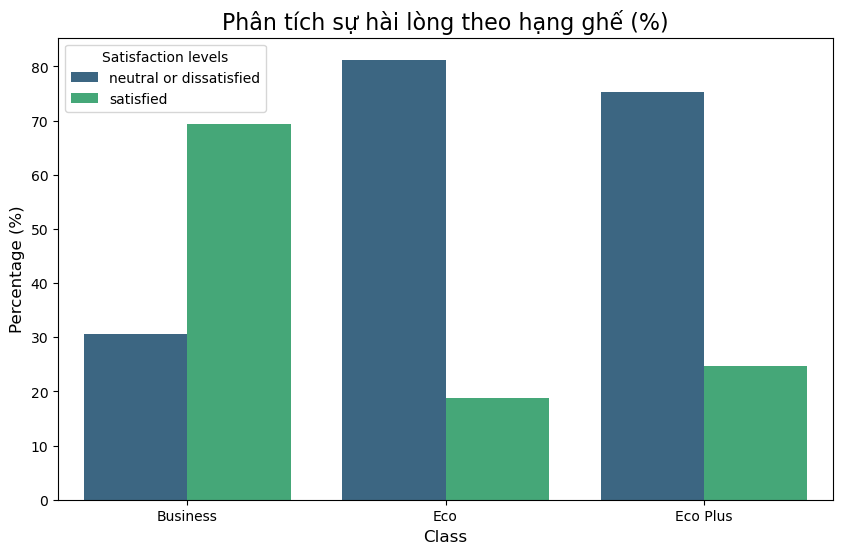

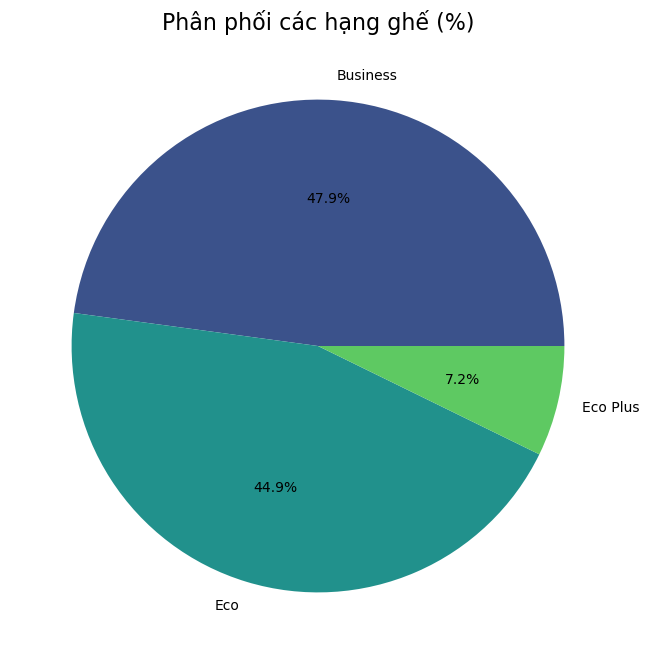

In [40]:
data_frame_copy_6 = data_frame.copy()
satisfaction_counts = data_frame_copy_6.groupby(["Class", "satisfaction"]).size().reset_index(name="Counts")
satisfaction_counts['Percentage'] = satisfaction_counts.groupby("Class")['Counts'].transform(lambda x: x / x.sum() * 100)
plt.figure(figsize=(10, 6))
sns.barplot(data=satisfaction_counts, x="Class", y="Percentage", hue="satisfaction", palette="viridis")
plt.title("Phân tích sự hài lòng theo hạng ghế (%)", fontsize=16)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.legend(title="Satisfaction levels")
plt.show()
ticket_counts = data_frame_copy_6['Class'].value_counts(normalize=True).reset_index()
ticket_counts.columns = ['Class', 'Percentage']
ticket_counts['Percentage'] *= 100  
plt.figure(figsize=(8, 8))
plt.pie(ticket_counts['Percentage'], labels=ticket_counts['Class'], autopct='%1.1f%%', colors=sns.color_palette("viridis", len(ticket_counts)))
plt.title("Phân phối các hạng ghế (%)", fontsize=16)
plt.show()

### Đánh giá về dịch vụ ăn uống , vị trí ngồi , sự sạch sẽ theo nhóm tuổi

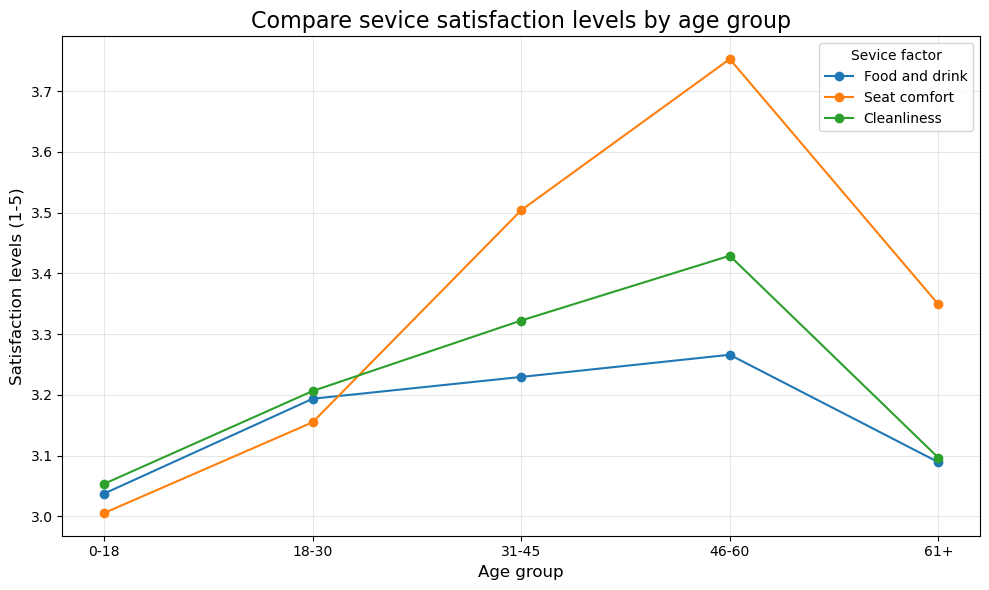

In [41]:
data_frame_copy_7 = data_frame.copy()
bins = [0, 18, 30, 45, 60, 100]   
labels = ['0-18','18-30', '31-45', '46-60', '61+'] 
data_frame_copy_7["Age Group"] = pd.cut(data_frame_copy_7["Age"], bins=bins, labels=labels)
service_columns = ["Food and drink", "Seat comfort", "Cleanliness"]
age_group_means = data_frame_copy_7.groupby("Age Group", observed=False)[service_columns].mean().reset_index()
plt.figure(figsize=(10, 6))
for column in service_columns:
    plt.plot(age_group_means["Age Group"], age_group_means[column], marker="o", label=column)
plt.title("Compare sevice satisfaction levels by age group", fontsize=16)
plt.xlabel("Age group", fontsize=12)
plt.ylabel("Satisfaction levels (1-5)", fontsize=12)
plt.legend(title="Sevice factor")
plt.grid(alpha=0.3)
plt.tight_layout()


### Tỉ lệ hài lòng về các dịch vụ theo loại vé 

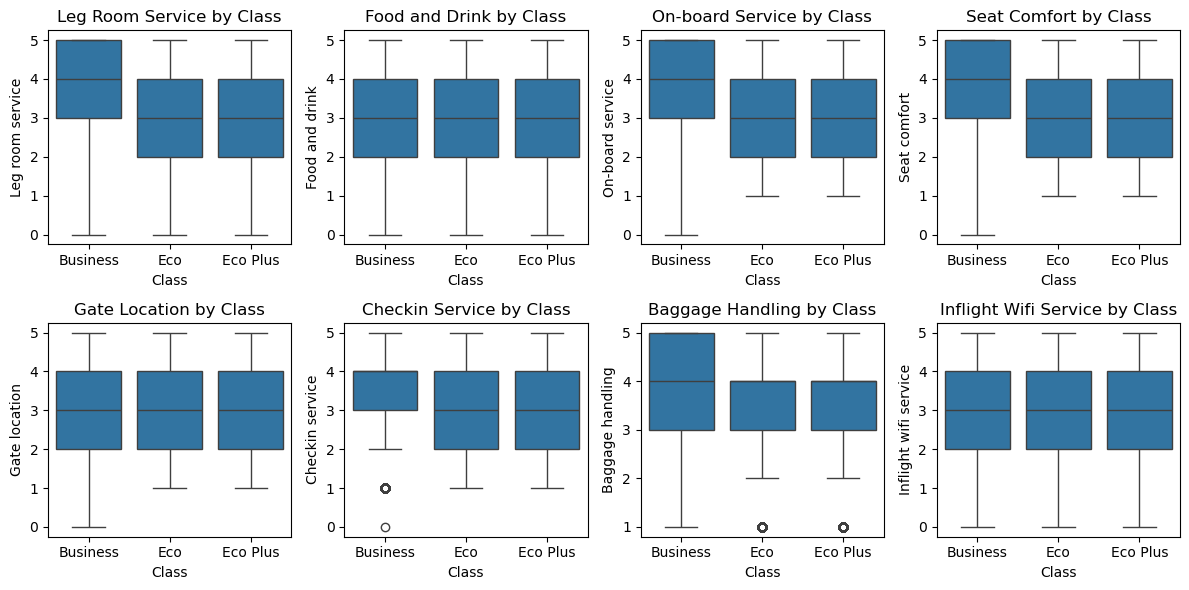

In [42]:
data_frame_copy_8 = data_frame.copy()
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
sns.boxplot(x='Class', y='Leg room service', data=data_frame_copy_8, ax=axes[0, 0])
axes[0, 0].set_title('Leg Room Service by Class')
sns.boxplot(x='Class', y='Food and drink', data=data_frame_copy_8, ax=axes[0, 1])
axes[0, 1].set_title('Food and Drink by Class')
sns.boxplot(x='Class', y='On-board service', data=data_frame_copy_8, ax=axes[0, 2])
axes[0, 2].set_title('On-board Service by Class')
sns.boxplot(x='Class', y='Seat comfort', data=data_frame_copy_8, ax=axes[0, 3])
axes[0, 3].set_title('Seat Comfort by Class')
sns.boxplot(x='Class', y='Gate location', data=data_frame_copy_8, ax=axes[1, 0])
axes[1, 0].set_title('Gate Location by Class')
sns.boxplot(x='Class', y='Checkin service', data=data_frame_copy_8, ax=axes[1, 1])
axes[1, 1].set_title('Checkin Service by Class')
sns.boxplot(x='Class', y='Baggage handling', data=data_frame_copy_8, ax=axes[1, 2])
axes[1, 2].set_title('Baggage Handling by Class')
sns.boxplot(x='Class', y='Inflight wifi service', data=data_frame_copy_8, ax=axes[1, 3])
axes[1, 3].set_title('Inflight Wifi Service by Class')
plt.tight_layout()
plt.show()


### Sự ảnh hưởng của các yếu tố tới Departure Delay in Minutes

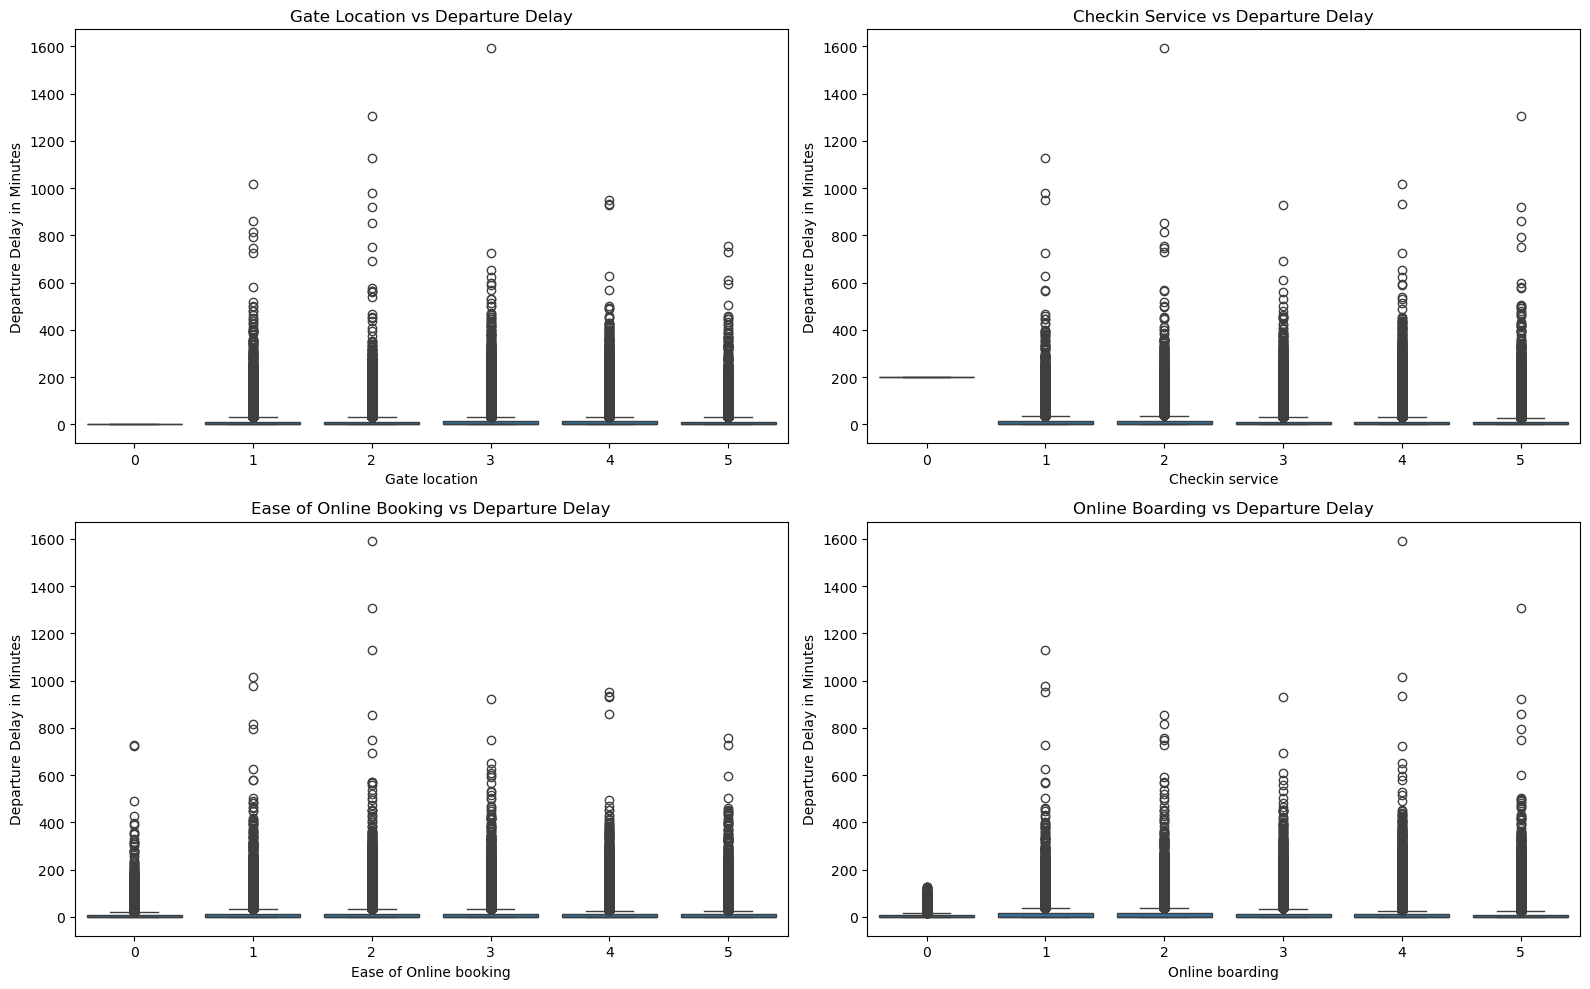

In [43]:
data_frame_copy_10 = data_frame.copy()
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
sns.boxplot(x='Gate location', y='Departure Delay in Minutes', data=data_frame_copy_10, ax=axes[0, 0])
axes[0, 0].set_title('Gate Location vs Departure Delay')
sns.boxplot(x='Checkin service', y='Departure Delay in Minutes', data=data_frame_copy_10, ax=axes[0, 1])
axes[0, 1].set_title('Checkin Service vs Departure Delay')
sns.boxplot(x='Ease of Online booking', y='Departure Delay in Minutes', data=data_frame_copy_10, ax=axes[1, 0])
axes[1, 0].set_title('Ease of Online Booking vs Departure Delay')
sns.boxplot(x='Online boarding', y='Departure Delay in Minutes', data=data_frame_copy_10, ax=axes[1, 1])
axes[1, 1].set_title('Online Boarding vs Departure Delay')
plt.tight_layout()
plt.show()

### Tỉ lệ hài lòng theo giới tính và độ tuổi

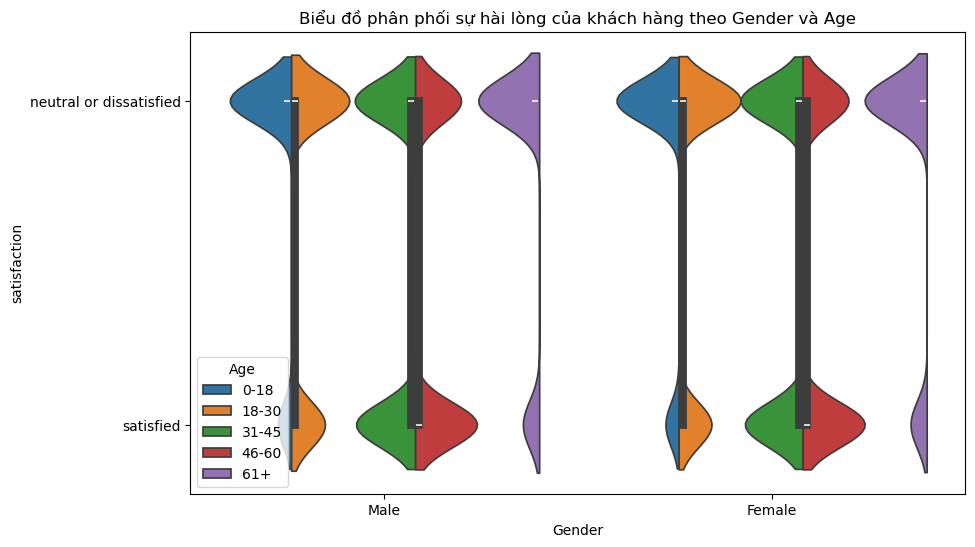

In [44]:
df_copy_1 = data_frame.copy()
bins = [0, 18, 30, 45, 60, 100]   
labels = ['0-18','18-30', '31-45', '46-60', '61+']
df_copy_1['Age'] = pd.cut(df_copy_1['Age'], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='satisfaction', hue='Age', data=df_copy_1, split=True)
plt.title('Biểu đồ phân phối sự hài lòng của khách hàng theo Gender và Age')
plt.show()

# Preparing data

### Xử lý dữ liệu 

In [45]:
data_model = data_frame.copy()
data_model['satisfaction'] = data_model['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})
# outline percentiles
max_flight_distance = data_model['Flight Distance'].quantile(0.99)
data_model = data_model[data_model['Flight Distance'] < max_flight_distance]
data_model['Flight Distance'] = data_model['Flight Distance'].astype(int)
# IQR
for col in ['Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    Q1 = data_model[col].quantile(0.25)
    Q3 = data_model[col].quantile(0.75)
    IQR = Q3 - Q1
    max_delay = Q3 + 1.5 * IQR
    min_delay = Q1 - 1.5 * IQR
    data_model = data_model[(data_model[col] < max_delay) & (data_model[col] > min_delay)]
# Z-score Age 
mean = data_model['Age'].mean()
std = data_model['Age'].std()
max_z_score = mean + 3 * std
min_z_score = mean - 3 * std
data_model = data_model[(data_model['Age'] < max_z_score) & (data_model['Age'] > min_z_score)]

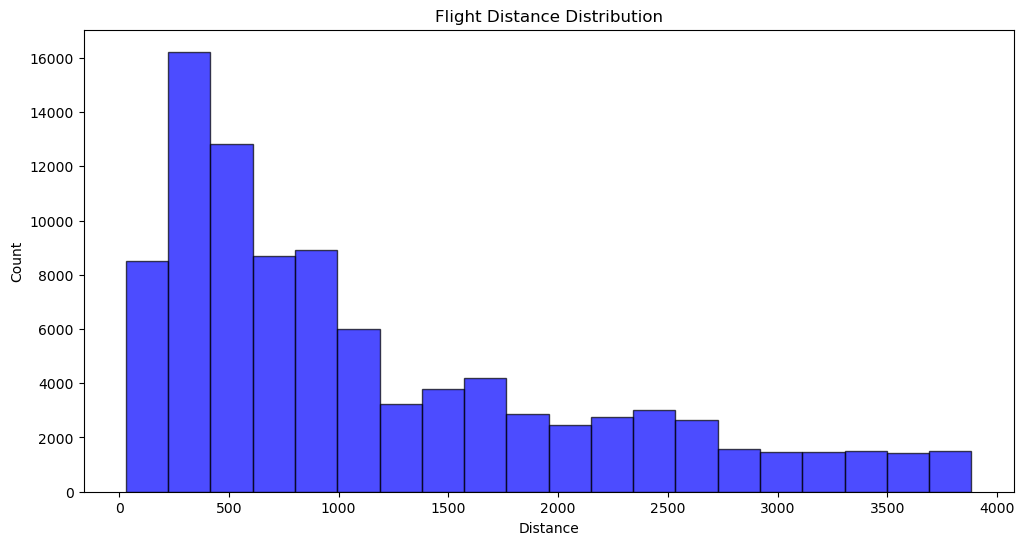

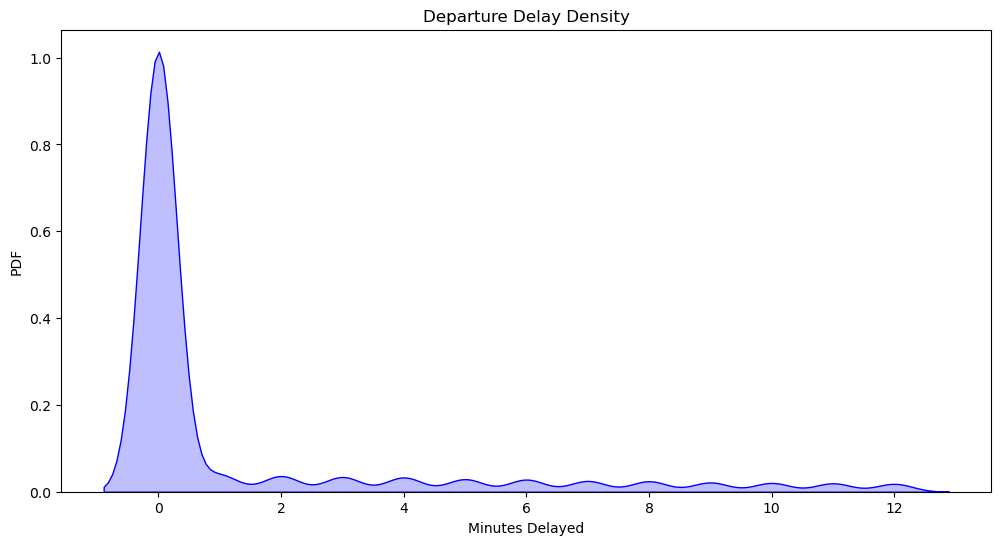

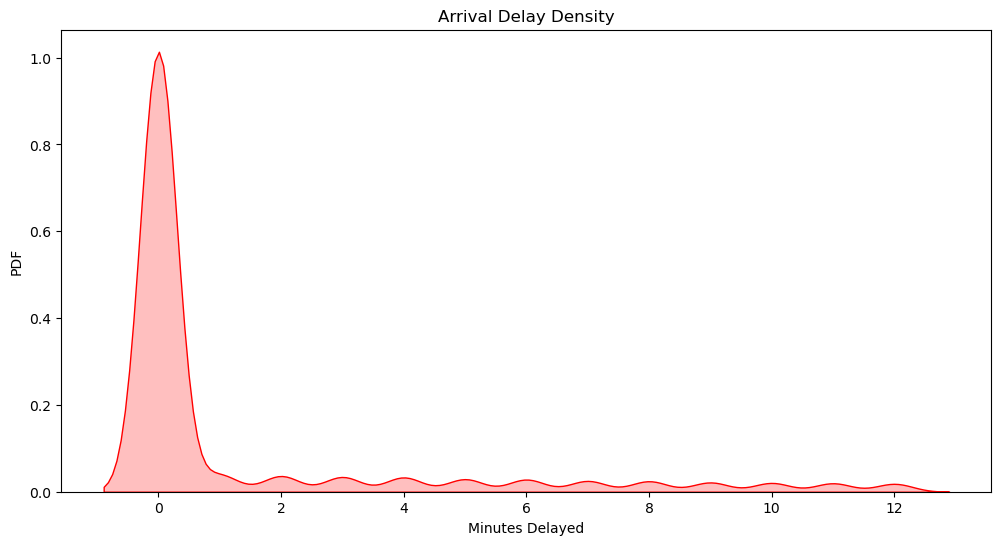

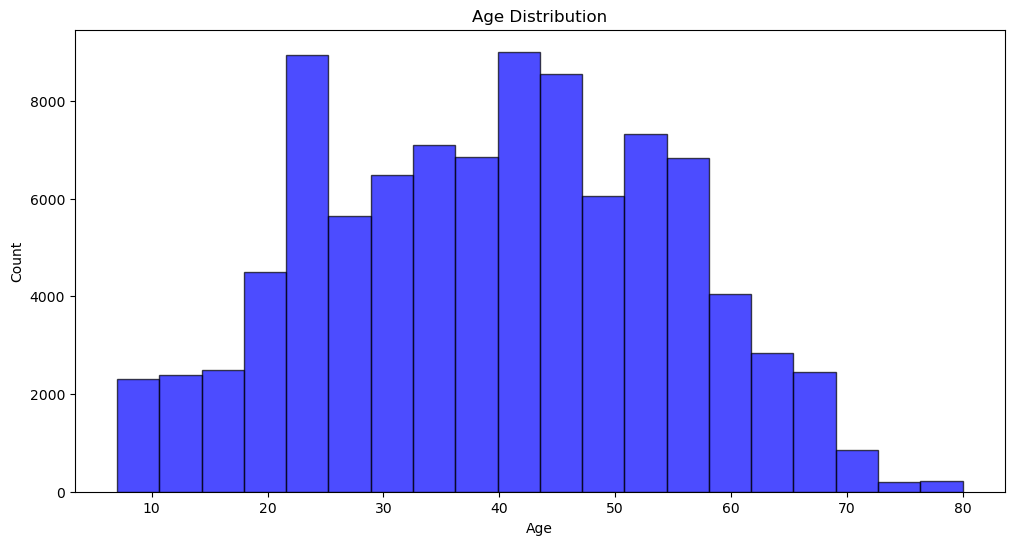

<Figure size 640x480 with 0 Axes>

In [46]:
# Histogram plot for Flight Distance
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(data_model['Flight Distance'], bins=20, color='blue', edgecolor='black', alpha=0.7)
ax.set_title("Flight Distance Distribution")
ax.set_xlabel("Distance")
ax.set_ylabel("Count")
plt.show()

# Line plot for Departure Delay in Minutes
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data_model['Arrival Delay in Minutes'], fill=True, color='blue', ax=ax)
ax.set_title("Departure Delay Density")
ax.set_xlabel("Minutes Delayed")
ax.set_ylabel("PDF")
plt.show()

# Line plot for Arrival Delay in Minutes
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data_model['Arrival Delay in Minutes'], fill=True, color='red', ax=ax)
ax.set_title("Arrival Delay Density")
ax.set_xlabel("Minutes Delayed")
ax.set_ylabel("PDF")
# Histogram plot for Age
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(data_model['Age'], bins=20, color='blue', edgecolor='black', alpha=0.7)
ax.set_title("Age Distribution")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
plt.show()
plt.show()
plt.tight_layout()
plt.show()

### One_hot Encoding

In [47]:
data_model.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [48]:
data_model.reset_index(drop=True, inplace=True)
ohe = OneHotEncoder(sparse_output=False)
feature_array = ohe.fit_transform(data_model[['Class']])
feature_label = ohe.categories_[0]  
feature_data = pd.DataFrame(feature_array, columns=feature_label)
data_model = pd.concat([data_model, feature_data], axis=1)


In [49]:
data_model.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Business', 'Eco', 'Eco Plus'],
      dtype='object')

### Label Encoding

In [50]:
data_model['Gender'].value_counts

<bound method IndexOpsMixin.value_counts of 0          Male
1          Male
2          Male
3        Female
4          Male
          ...  
95050    Female
95051    Female
95052      Male
95053      Male
95054    Female
Name: Gender, Length: 95055, dtype: object>

In [51]:
data_model.reset_index(drop=True, inplace=True)
lbe = LabelEncoder()
data_model['Gender'] = lbe.fit_transform(data_model['Gender'])
data_model['Customer Type'] = lbe.fit_transform(data_model['Customer Type'])
data_model['Type of Travel'] = lbe.fit_transform(data_model['Type of Travel'])

In [52]:
data_model['Gender'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1        1
2        1
3        0
4        1
        ..
95050    0
95051    0
95052    1
95053    1
95054    0
Name: Gender, Length: 95055, dtype: int32>

In [53]:
data_model = data_model.drop(columns=['Class'])
data_model = data_model.astype(float)

In [54]:
data_model

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
0,1.0,1.0,48.0,0.0,821.0,3.0,3.0,3.0,3.0,5.0,...,5.0,4.0,5.0,5.0,2.0,5.0,0.0,1.0,0.0,0.0
1,1.0,0.0,41.0,0.0,853.0,4.0,4.0,4.0,4.0,5.0,...,3.0,4.0,3.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,50.0,0.0,1905.0,2.0,2.0,2.0,2.0,4.0,...,5.0,3.0,5.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,49.0,0.0,3470.0,3.0,3.0,3.0,3.0,4.0,...,3.0,3.0,3.0,5.0,0.0,1.0,1.0,1.0,0.0,0.0
4,1.0,0.0,43.0,0.0,3788.0,4.0,4.0,4.0,4.0,3.0,...,4.0,3.0,4.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95050,0.0,0.0,28.0,1.0,337.0,4.0,2.0,4.0,4.0,3.0,...,3.0,4.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
95051,0.0,0.0,55.0,1.0,308.0,3.0,4.0,3.0,4.0,2.0,...,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
95052,1.0,0.0,28.0,1.0,447.0,4.0,4.0,4.0,2.0,4.0,...,4.0,4.0,5.0,4.0,2.0,3.0,0.0,0.0,0.0,1.0
95053,1.0,0.0,41.0,1.0,308.0,3.0,5.0,3.0,4.0,2.0,...,5.0,5.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0


# Model Learning 

## Model Classification 

### Phân loại satisfaction (RandomForestClassifier)

In [55]:
# train model
X_model_1 = data_model.drop('satisfaction', axis=1)
y_model_1 = data_model['satisfaction']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_model_1, y_model_1, test_size=0.2, random_state=42)
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_1.fit(X_train_1, y_train_1) 
y_pred_1 = model_1.predict(X_test_1)

In [56]:
# dánh giá tỉ lệ dự đoán đúng 
precision = precision_score(y_test_1, y_pred_1, average='binary')
# đánh giá độ nhạy 
recall = recall_score(y_test_1, y_pred_1, average='binary')
## F1-score
f1 = f1_score(y_test_1, y_pred_1, average='binary')
print(f"Độ chính xác : {precision}")
print(f"Độ nhạy : {recall}")
print(f"F1-score: {f1}")

Độ chính xác : 0.9707574304889741
Độ nhạy : 0.9391304347826087
F1-score: 0.9546820672991927


C:\Users\abc\AppData\Local\Temp\ipykernel_12652\1276078916.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_1_vis, x='Importance', y='Feature', palette='viridis', ax=ax)


Text(0, 0.5, ' ')

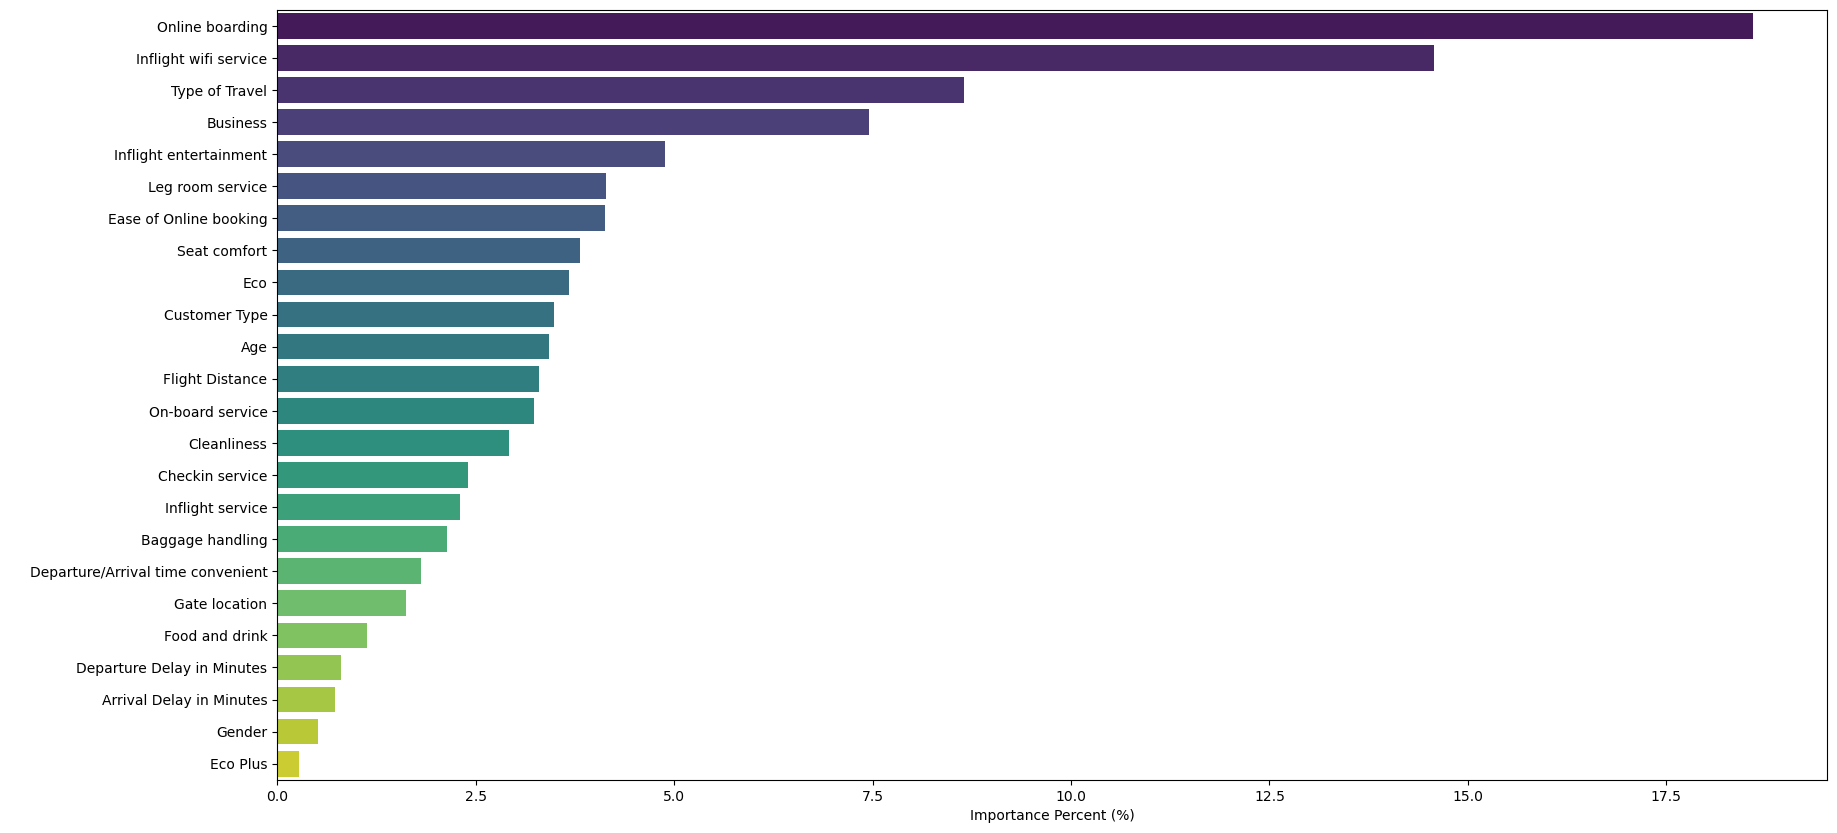

In [57]:
# trực quan model 
model_1_vis = pd.DataFrame({
    'Feature': X_model_1.columns,
    'Importance': model_1.feature_importances_*100
}).sort_values(by='Importance', ascending=False)
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=model_1_vis, x='Importance', y='Feature', palette='viridis', ax=ax)
plt.xlabel('Importance Percent (%)') 
plt.ylabel(' ')


,Inflight wifi service,Online boarding,satisfaction
26743,5.0,4.0,1.0
91778,1.0,5.0,1.0
88093,3.0,4.0,1.0
59955,3.0,5.0,1.0
52577,0.0,1.0,1.0
...,...,...,...
90122,3.0,3.0,0.0
17433,4.0,2.0,0.0
80369,3.0,3.0,0.0
66929,1.0,4.0,1.0


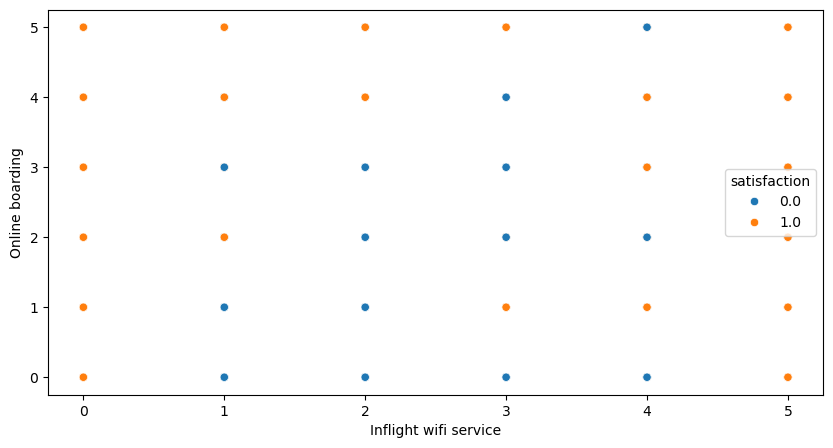

In [58]:
vis_data = pd.concat([X_test_1[['Inflight wifi service','Online boarding']],y_test_1],axis=1)
fig,ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=vis_data,x='Inflight wifi service', y='Online boarding',hue='satisfaction')
vis_data

### Phân loại Customer Type (LogisticRegression)

In [59]:
# train model
X_model_2 = data_model[['Age', 'Gender', 'Type of Travel', 'Flight Distance', 
                        'satisfaction',  'Business', 'Eco', 'Eco Plus']]
y_model_2 = data_model['Customer Type']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_model_2, y_model_2, test_size=0.2, random_state=42)
model_2 = LogisticRegression()
model_2.fit(X_train_2, y_train_2)
y_pred_2 = model_2.predict(X_test_2)

c:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
# dánh giá độ chính xác  
precision = precision_score(y_test_2, y_pred_2, average='binary')
# đánh giá độ nhạy 
recall = recall_score(y_test_2, y_pred_2, average='binary')
## F1-score
f1 = f1_score(y_test_2, y_pred_2, average='binary')
print(f"Độ chính xác : {precision}")
print(f"Độ nhạy : {recall}")
print(f"F1-score: {f1}")

Độ chính xác : 0.7560410460112545
Độ nhạy : 0.6406732117812062
F1-score: 0.6935924688733678


C:\Users\abc\AppData\Local\Temp\ipykernel_12652\1155231674.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_2_vis, x='Importance', y='Feature', palette='viridis', ax=ax)


Text(0, 0.5, ' ')

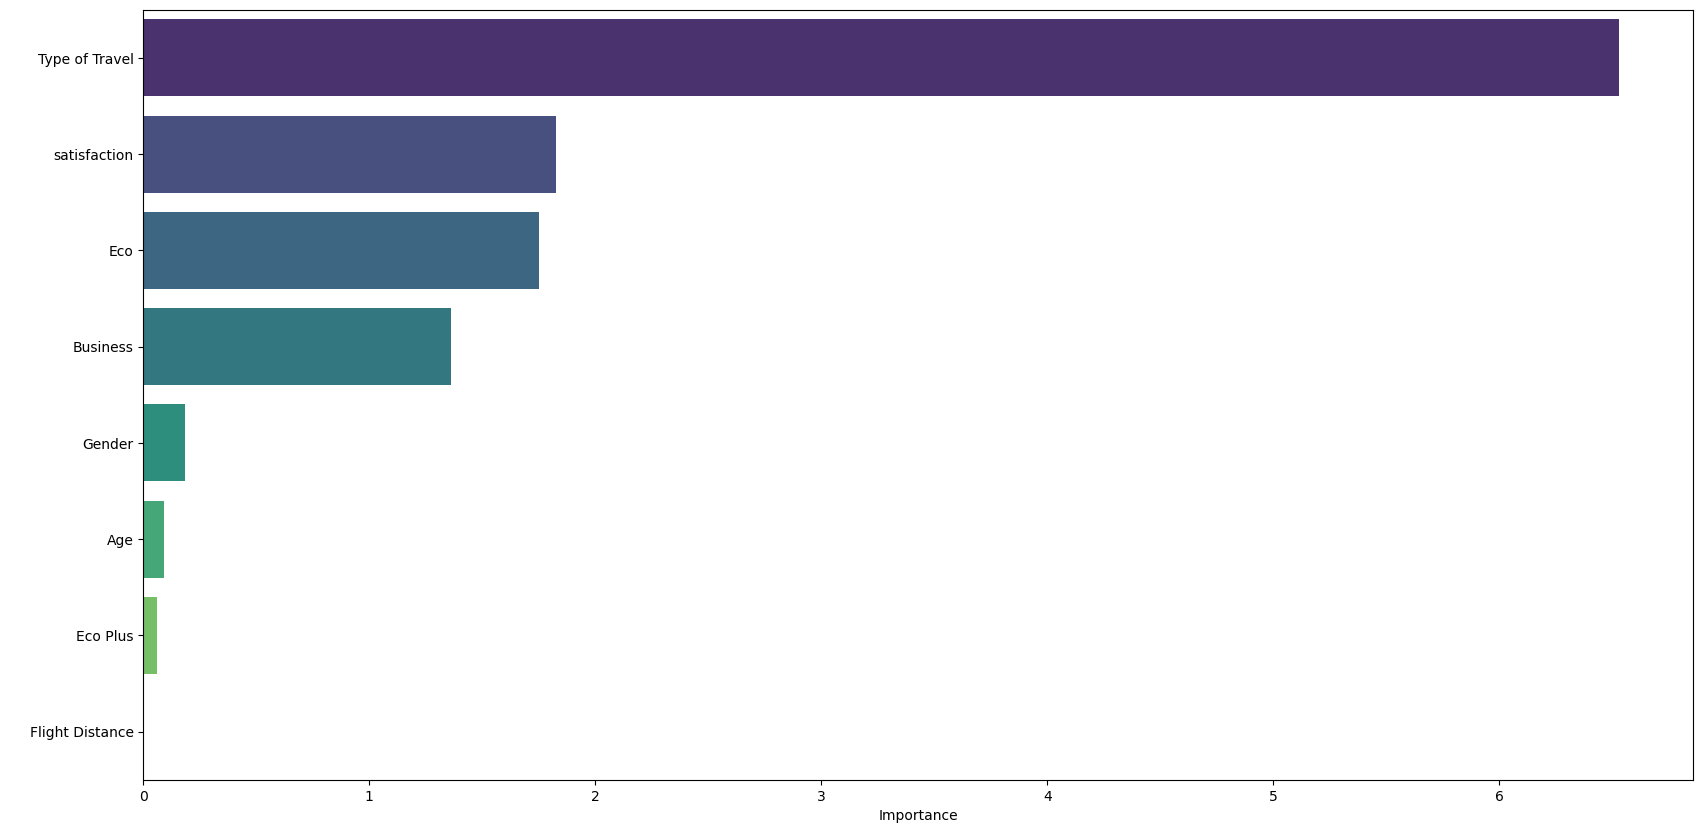

In [61]:
# trực quan model 
coef = model_2.coef_[0]
model_2_vis = pd.DataFrame({
    'Feature': X_model_2.columns,
    'Importance': abs(coef)
}).sort_values(by='Importance', ascending=False)
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=model_2_vis, x='Importance', y='Feature', palette='viridis', ax=ax)
plt.xlabel('Importance') 
plt.ylabel(' ')

## Model Linear Regression

### Dự đoán thời gian delay đến biết delay thời gian khởi hành 

In [62]:
#train model
X_model_4 = data_model[['Departure Delay in Minutes']]
y_model_4 = data_model['Arrival Delay in Minutes']
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_model_4, y_model_4, test_size=0.2, random_state=42)
model_4 = LinearRegression()
model_4.fit(X_train_4, y_train_4)
y_pred_4 = model_4.predict(X_test_4)


In [63]:
# đánh giá model
r2 = r2_score(y_test_4, y_pred_4)
mae = mean_absolute_error(y_test_4, y_pred_4)
mse = mean_squared_error(y_test_4, y_pred_4)
rmse = np.sqrt(mse)

print(f"R² Score: {r2}")
print(f"Độ lớn trung bình của sai số giữa giá trị thực và giá trị dự đoán: {mae}")
print(f"Trung bình bình phương của sai số: {mse}")
print(f"Mức độ sai lệch trung bình của dự đoán: {rmse}")

R² Score: 0.18063292248322793
Độ lớn trung bình của sai số giữa giá trị thực và giá trị dự đoán: 1.7323911620477912
Trung bình bình phương của sai số: 6.8792520612748636
Mức độ sai lệch trung bình của dự đoán: 2.62283283136285
